# Netflix EDA Storytelling Project 

#### Step 1: Dataset Overview

In this step, we perform an initial exploration of the dataset to understand:
- The structure and size of the data
- Column names, data types, and null counts
- Basic shape of the dataset (rows × columns)

This helps identify any immediate issues with missing or inconsistent data and gives us a clear idea of the attributes we can explore in later steps.


Importing the libaries

In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

Loading the Dataset

In [39]:
df = pd.read_csv("netflix_titles.csv")

Initial Inspection

In [40]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Shape and Info

In [41]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Descriptive Stats

In [42]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


Missing Values

In [43]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Duplicates

In [44]:
df.duplicated().sum()

np.int64(0)

### Step 2: Data Cleaning

Before diving into analysis, we need to make sure our data is in good shape. In this step:
- We handle missing values
- Parse and split the `duration` column
- Convert dates and extract time features
- Clean up the dataset for visualization and analysis


Fill missing values for director, cast, country

In [45]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

Drop rows with missing date_added, rating, or duration

In [46]:
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

Convert date_added to datetime and extract year/month

In [47]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

Clean duration column into numeric and type

In [48]:
df['duration'] = df['duration'].fillna('0 min')  # just in case
df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_int'] = df['duration_int'].astype(int)

 Reset index after dropping rows

In [49]:
df.reset_index(drop=True, inplace=True)

Quick verification

In [50]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8790 non-null   object        
 1   type           8790 non-null   object        
 2   title          8790 non-null   object        
 3   director       8790 non-null   object        
 4   cast           8790 non-null   object        
 5   country        8790 non-null   object        
 6   date_added     8702 non-null   datetime64[ns]
 7   release_year   8790 non-null   int64         
 8   rating         8790 non-null   object        
 9   duration       8790 non-null   object        
 10  listed_in      8790 non-null   object        
 11  description    8790 non-null   object        
 12  year_added     8702 non-null   float64       
 13  month_added    8702 non-null   float64       
 14  duration_int   8790 non-null   int64         
 15  duration_type  8790 n

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1,Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2,Seasons



### Step 3: Univariate Analysis

In this step, we perform exploratory analysis on individual features of the Netflix dataset. 
The goal is to understand distributions, identify trends, and spot potential data quality issues. 

We’ll start with quick overviews, then deep dive into key variables for storytelling.


Quick Overview for All Categorical Features

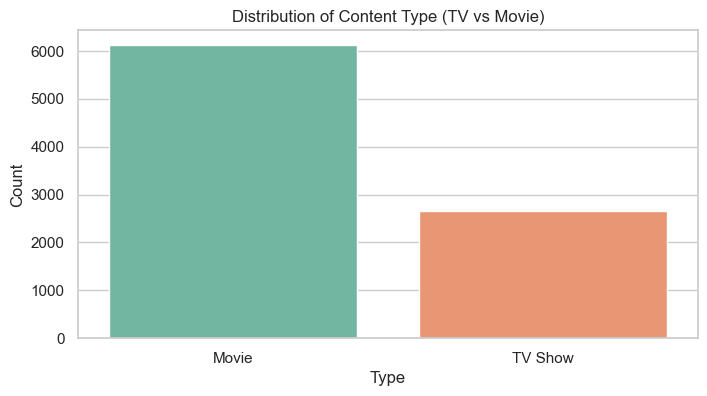

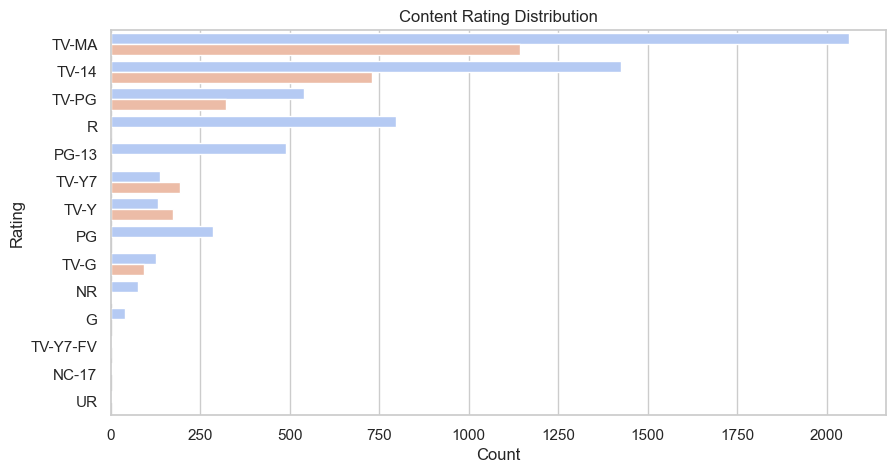

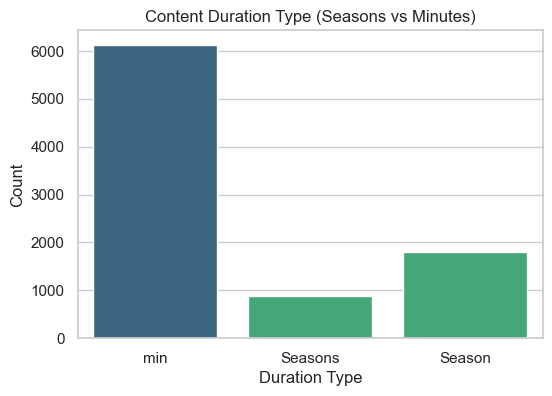

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

# Type
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title('Distribution of Content Type (TV vs Movie)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Rating
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, hue='type', palette='coolwarm', legend=False)
plt.title('Content Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

# Duration type
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='duration_type', hue='type', palette='viridis', legend=False)
plt.title('Content Duration Type (Seasons vs Minutes)')
plt.xlabel('Duration Type')
plt.ylabel('Count')
plt.show()

Insight: Year Added

Netflix’s library has grown rapidly since 2015, with a significant spike in new content around 2018–2020. The dip post-2020 may reflect production halts due to the global pandemic. 
This tells us how the platform's catalog evolved over time.


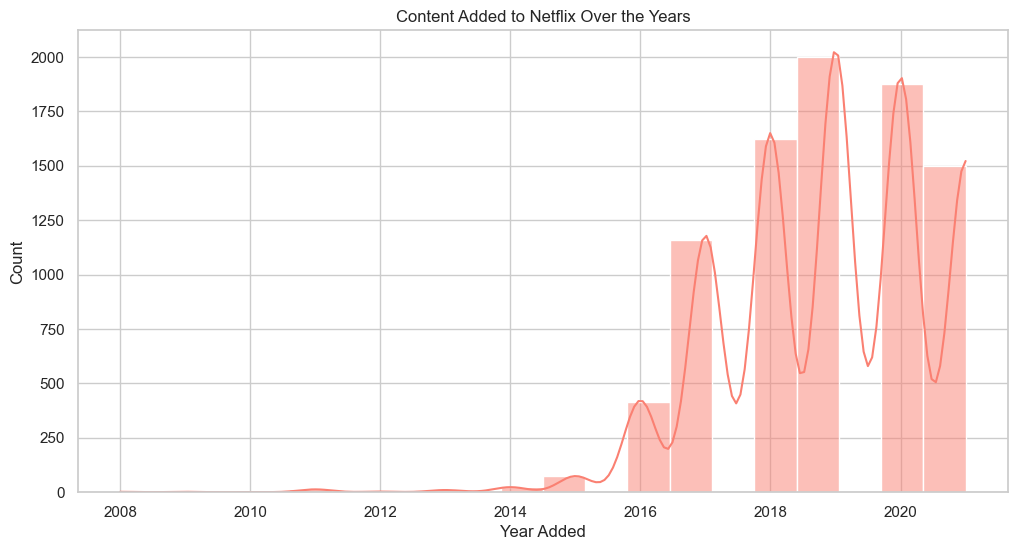

In [52]:
# Year added distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['year_added'].dropna(), bins=20, kde=True, color='salmon')
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()

Insight: Release Year

Most content on Netflix was released after 2000, with a sharp increase in titles from the 2010s onward. This aligns with Netflix’s transformation into a streaming giant and original content producer.


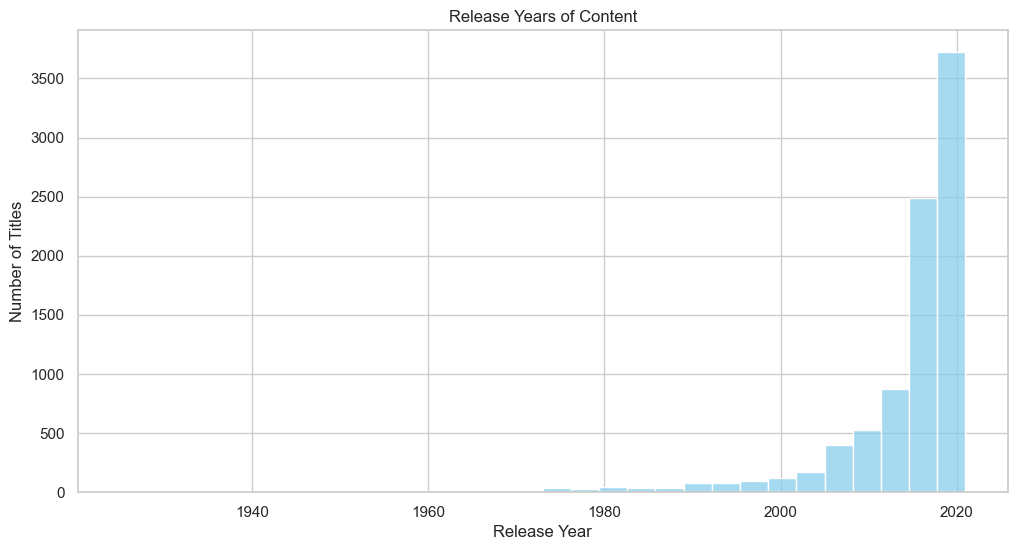

In [53]:
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, color='skyblue', kde=False)
plt.title('Release Years of Content')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


WordCloud for listed_in (Genres)

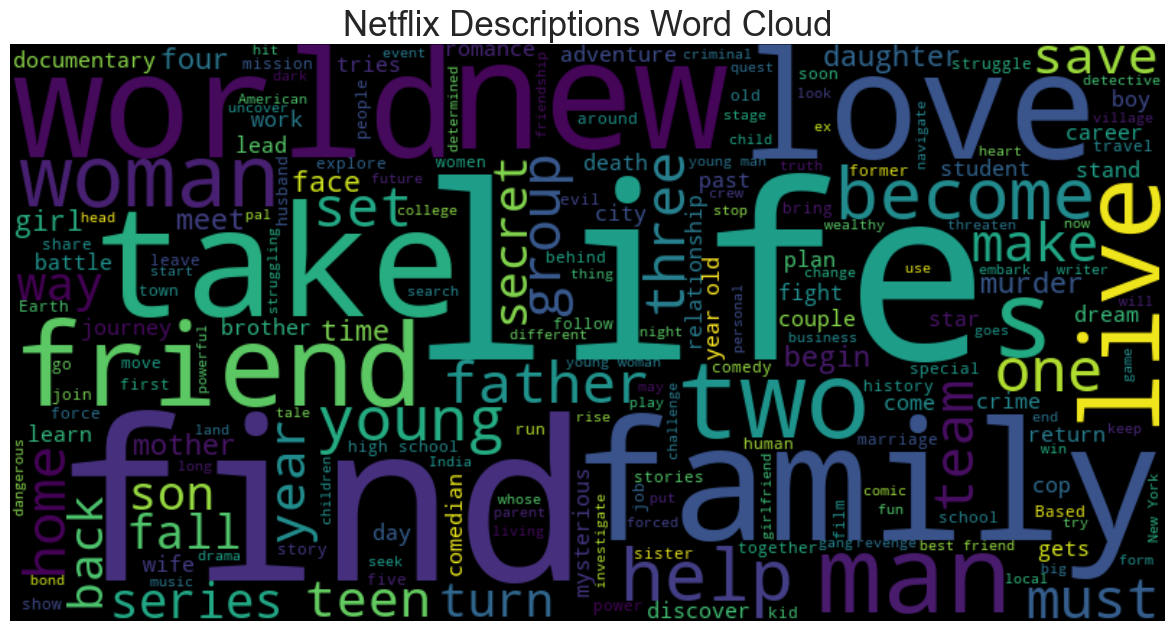

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example WordCloud from 'description' column
text = " ".join(df['description'].dropna().astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Descriptions Word Cloud', fontsize=25)
plt.show()

##### Summary of Univariate Insights :

- **Movies** slightly outnumber **TV Shows** in the dataset.
- Most content is rated **TV-MA** and **PG-13**, showing a trend toward mature audiences.
- Netflix ramped up content addition significantly post-2015.
- A large portion of titles were originally released after the year 2000.
- Genre analysis reveals a wide variety of content categories, with a strong emphasis on **international TV**, **dramas**, and **comedies**.


### Step 4: Bivariate Analysis

In this step, we analyze how two features interact with each other. This helps us understand relationships, patterns, and potential causation between variables. 

We'll focus on comparisons like content type vs genre, release trends over time, and regional or rating patterns. 
This adds depth and storytelling power to our EDA.


 *ANALYSIS 1: Content Type vs Rating*

This comparison reveals which content types are dominant in each rating category. For example, **TV-MA** is dominated by TV shows, while **PG and PG-13** skew more towards movies. 
It highlights audience targeting across content formats.


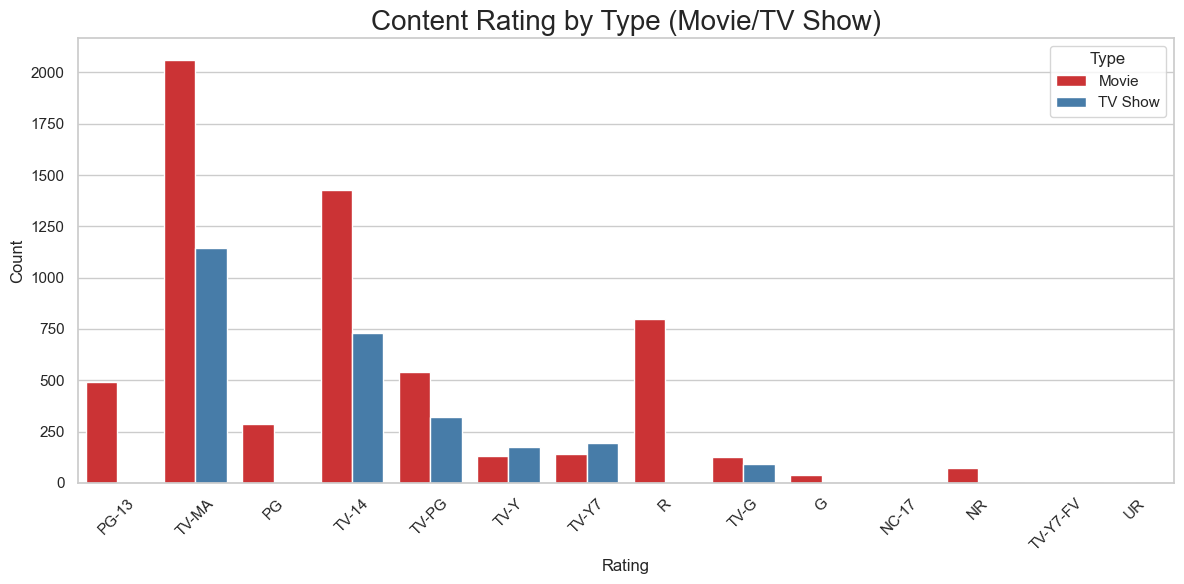

In [55]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='type', palette='Set1')
plt.title('Content Rating by Type (Movie/TV Show)', fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

*ANALYSIS 2: Year Added vs Type*

Here we see how Netflix has scaled its addition of **TV Shows vs Movies** over time. A sharp rise in TV content post-2017 suggests a stronger push toward bingeable series, aligning with their original production strategy.


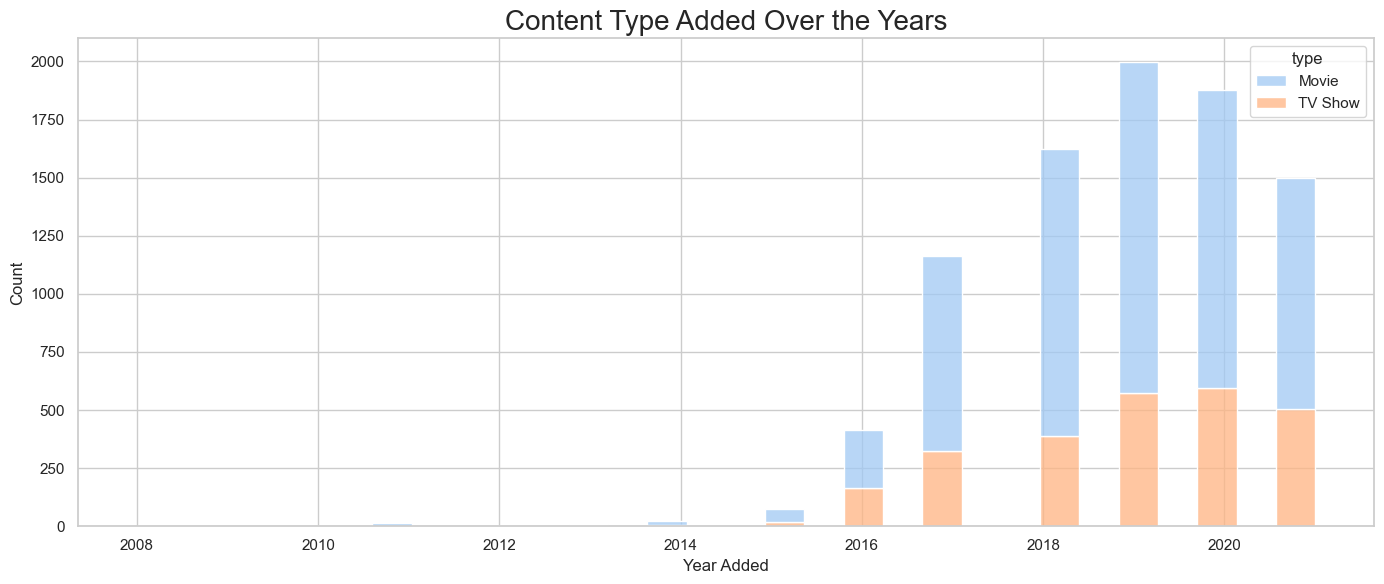

In [56]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='year_added', hue='type', multiple='stack', palette='pastel', bins=30)
plt.title('Content Type Added Over the Years', fontsize=20)
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

ANALYSIS 3: Release Year vs Rating

This boxplot helps spot whether certain ratings are more common in older vs newer content. 
For example, **TV-Y** content tends to be more evenly distributed, while **TV-MA** peaks in more recent years — suggesting changing viewer tastes.


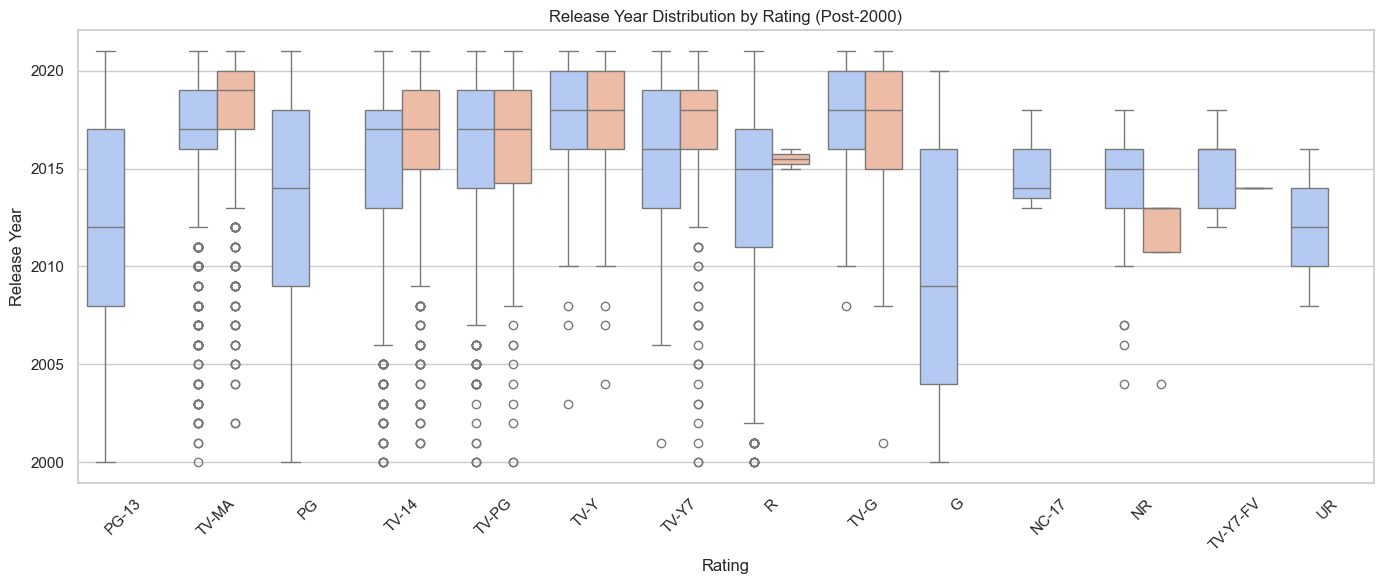

In [57]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[df['release_year'] >= 2000], x='rating', y='release_year', hue='type', palette='coolwarm', legend=False)
plt.title('Release Year Distribution by Rating (Post-2000)')
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ANALYSIS 4: Country vs Type (Top 10 Countries)

This reveals that countries like the **United States, India, and UK** produce both Movies and TV Shows, whereas others lean more heavily in one direction. 
Great way to highlight diversity and content geography.


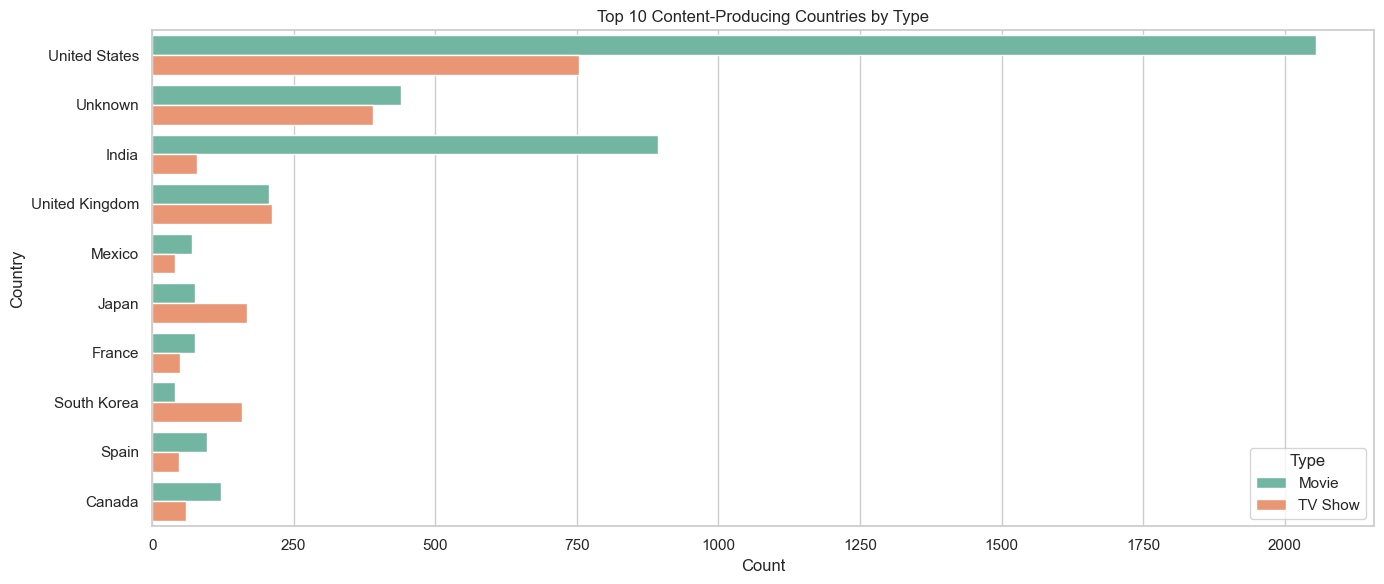

In [58]:
top_countries = df['country'].value_counts().head(10).index
filtered_df = df[df['country'].isin(top_countries)]

plt.figure(figsize=(14, 6))
sns.countplot(data=filtered_df, y='country', hue='type', palette='Set2')
plt.title('Top 10 Content-Producing Countries by Type')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


Interactive PLotly Graph for Content Type vs Rating

In [59]:
import plotly.express as px
import pandas as pd

# Sample groupby (replace 'df' with your actual cleaned DataFrame)
type_rating = df.groupby(['type', 'rating']).size().reset_index(name='count')

# Interactive Plotly bar chart
fig = px.bar(
    type_rating,
    x='rating',
    y='count',
    color='type',
    barmode='group',
    title='Distribution of Content by Type and Rating',
    labels={'rating': 'Rating', 'count': 'Count'}
)

fig.update_layout(
    xaxis_tickangle=-45,
    template='plotly_white'
)

fig.show()

##### Summary of Bivariate Insights :

- **Movies dominate in PG/PG-13**, while **TV Shows dominate in TV-MA and TV-14**.
- Post-2017 saw a surge in **TV content**, reflecting Netflix’s shift to original series.
- **TV-MA and mature-rated content** are heavily concentrated in recent years.
- The **United States, India, and UK** lead in content production, showing Netflix’s global reach.

These insights support deeper storytelling and align with Netflix’s business evolution.


### Step 5: Data Cleaning & Preprocessing

Before we go any deeper, we need to clean our Netflix dataset for better visualizations and insights.

**Tasks in this step:**
- Convert `date_added` to datetime format
- Extract `year_added` and `month_added`
- Handle missing values in key columns
- Clean up whitespace and duplicates
- Prepare columns like `cast`, `director`, and `listed_in` for future analysis


In [ ]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Create new columns for year and month added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Fill missing values with placeholders (or drop depending on context)
df['country'] = df['country'].fillna('Unknown')
df['cast'] = df['cast'].fillna('No Data')
df['director'] = df['director'].fillna('No Data')
df['rating'] = df['rating'].fillna('Unknown')

# Remove leading/trailing whitespaces
df['title'] = df['title'].str.strip()
df['country'] = df['country'].str.strip()
df['rating'] = df['rating'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()

# Remove unknown values
df = df[df['rating'] != 'Unknown']
df = df[df['country'] != 'Unknown']

# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# Quick check of missing values now
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added       85
release_year      0
rating            0
duration          0
listed_in         0
description       0
year_added       85
month_added      85
duration_int      0
duration_type     0
dtype: int64

### Step 6: Themed Exploratory Data Analysis (Minimal & Impactful)

In this step, we explore the Netflix dataset from four key angles — **Genre, Country, Rating, and Duration** — while mixing in time-based trends where needed. Instead of flooding the notebook with graphs, we focus on **only the most insightful visualizations**.

##### 6.1 Top Genres on Netflix

Netflix content is categorized under multiple genres like "Dramas", "Comedies", "Documentaries", etc. 
In this section, we'll identify the most common genres across all titles to understand what kind of content dominates the platform.


The most frequent genres on Netflix are usually "Dramas", "Comedies", and "Documentaries". 
This aligns with global audience preferences — drama provides storytelling depth, comedy adds bingeability, and docs offer educational engagement.



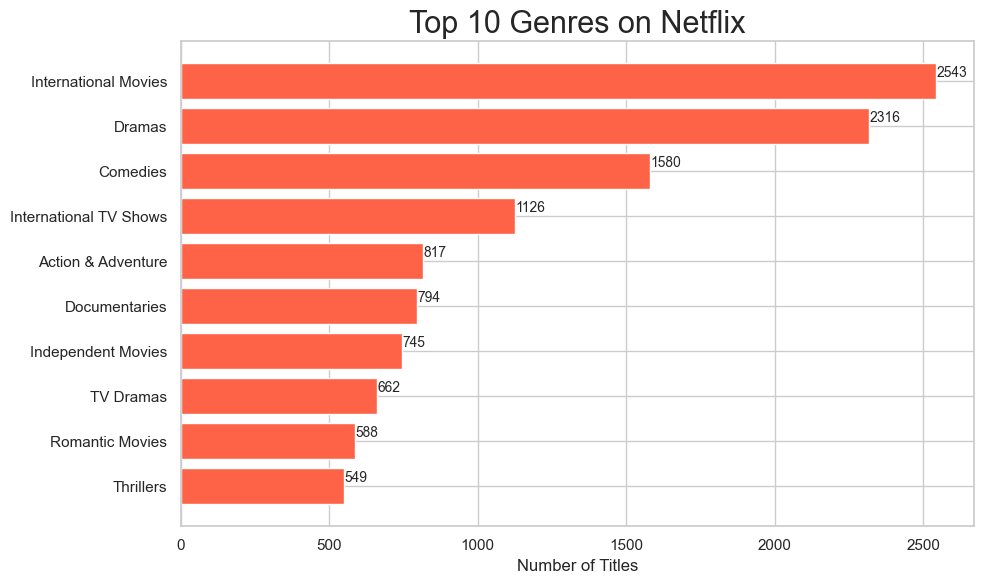

In [61]:
df.rename(columns={'listed_in': 'genre'}, inplace=True)

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Split multiple genres and count frequencies
genre_list = df['genre'].dropna().apply(lambda x: x.split(', '))
flat_genres = [genre for sublist in genre_list for genre in sublist]
genre_counts = Counter(flat_genres)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
bars = plt.barh(genre_df['Genre'], genre_df['Count'], color='tomato')
plt.xlabel("Number of Titles")
plt.title("Top 10 Genres on Netflix", fontsize=22)
plt.gca().invert_yaxis()  # Highest at top
for bar in bars:
    plt.text(bar.get_width()+2, bar.get_y()+0.3, bar.get_width(), fontsize=10)
plt.tight_layout()
plt.show()


##### 6.2 Top Content-Producing Countries

Netflix sources content from all over the world — Hollywood, Bollywood, Korea, Japan, Europe, and beyond. 
Let's break down which countries contribute the most content to the Netflix catalog.


The United States dominates Netflix content, followed by India, the United Kingdom, and other major production hubs. This reflects both local production investment and global licensing strategies. 
The rise of Indian and Korean content aligns with their growing global popularity.

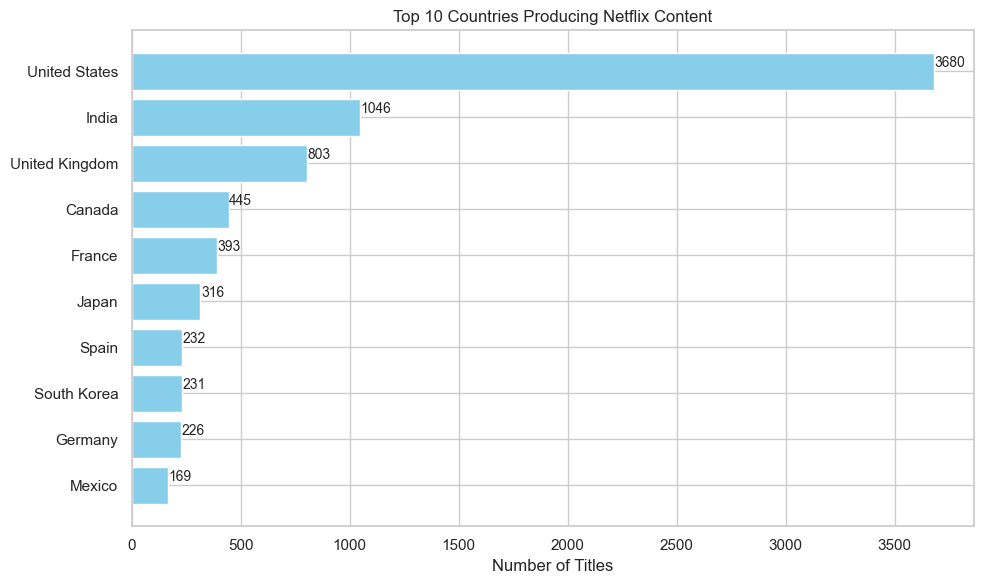

In [62]:
df.rename(columns={'<your_column_name>': 'country'}, inplace=True)

# Remove 'Unknown' and NaN, then explode country list
country_series = df['country'][~df['country'].isin(['Unknown', 'unknown'])].dropna().apply(lambda x: x.split(', '))
flat_countries = [country.strip() for sublist in country_series for country in sublist]


# Clean & explode country column
country_series = df['country'].dropna().apply(lambda x: x.split(', '))
flat_countries = [country.strip() for sublist in country_series for country in sublist]

# Count countries
from collections import Counter
country_counts = Counter(flat_countries)
country_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Count'])
country_df = country_df.sort_values(by='Count', ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
bars = plt.barh(country_df['Country'], country_df['Count'], color='skyblue')
plt.xlabel("Number of Titles")
plt.title("Top 10 Countries Producing Netflix Content")
plt.gca().invert_yaxis()
for bar in bars:
    plt.text(bar.get_width()+2, bar.get_y()+0.3, bar.get_width(), fontsize=10)
plt.tight_layout()
plt.show()


#### 6.3 Ratings Distribution by Content Type

This plot explores how Netflix distributes **audience ratings** across **Movies** and **TV Shows**. Audience ratings such as `TV-MA`, `PG-13`, and `TV-Y7` help define the target viewer group—whether it's family-friendly, teen-focused, or mature content.


- **TV Shows** dominate in ratings like `TV-14`, `TV-Y7`, and `TV-MA`, highlighting a focus on teen and adult series.
- **Movies** are strong in categories such as `PG-13`, `R`, and `TV-MA`, skewing towards a slightly older demographic.
- The overlap in `TV-MA` across both types reflects Netflix’s strong investment in **mature content** for both formats.

This breakdown helps us understand how **content type influences the audience segment** Netflix targets through its rating strategy.


In [63]:
import plotly.express as px

# Drop nulls to avoid skewing the chart
rating_data = df[['rating', 'type']].dropna()

# Plot: Count of ratings by content type
fig = px.histogram(rating_data, 
                   x='rating', 
                   color='type', 
                   barmode='group',
                   title='Distribution of Ratings by Content Type', 
                   labels={'rating': 'Content Rating', 'count': 'Number of Titles'},
                   color_discrete_sequence=['#EF553B', '#636EFA'])  # Red for movies, blue for TV

fig.update_layout(xaxis_title='Rating',
                  yaxis_title='Number of Titles',
                  bargap=0.2)

fig.show()


#### 6.4 Duration Distribution — Movies vs TV Shows

How long is the average Netflix binge? 
This section breaks down the distribution of durations for Movies and the number of seasons for TV Shows to understand content length trends.


- **Most movies** on Netflix fall in the range of **80 to 120 minutes**, perfect for casual evening viewers.
- **TV Shows** are heavily concentrated at **1-2 seasons**, showing a high count of mini-series or experimental shows.
- Netflix seems to favor short, consumable content formats — a trend likely driven by binge-watch culture and viewer attention spans.



In [64]:
import plotly.express as px

# Separate Movies and TV Shows
movies_df = df[df['type'] == 'Movie'].copy()
tv_df = df[df['type'] == 'TV Show'].copy()

# Convert duration for movies (strip "min" and convert to int)
movies_df['duration'] = movies_df['duration'].str.replace(' min', '', regex=False)
movies_df['duration'] = pd.to_numeric(movies_df['duration'], errors='coerce')

# Convert duration for TV Shows (strip "Season(s)")
tv_df['duration'] = tv_df['duration'].str.replace(' Season', '', regex=False).str.replace('s', '', regex=False)
tv_df['duration'] = pd.to_numeric(tv_df['duration'], errors='coerce')

# Plot: Histogram for Movies
fig1 = px.histogram(movies_df, 
                    x='duration', 
                    nbins=50, 
                    title='Movie Duration Distribution (in minutes)', 
                    labels={'duration': 'Duration (minutes)'}, 
                    color_discrete_sequence=['#00CC96'])

fig1.update_layout(yaxis_title='Number of Movies')
fig1.show()

# Plot: Histogram for TV Shows
fig2 = px.histogram(tv_df, 
                    x='duration', 
                    nbins=10, 
                    title='TV Show Duration Distribution (in seasons)', 
                    labels={'duration': 'Number of Seasons'}, 
                    color_discrete_sequence=['#AB63FA'])

fig2.update_layout(yaxis_title='Number of TV Shows')
fig2.show()


### Step 7: Multivariate Analysis

In this step, we go beyond simple pairwise comparisons to understand how multiple features interact simultaneously — providing richer, more actionable insights.


#### 7.1 Content Release Trends by Country & Type

This plot shows how the type of content (Movies vs TV Shows) has evolved over the years across the **top 3 countries** contributing the most content to Netflix.

**Insights:**
- The United States dominates Netflix's content library, with both Movies and TV Shows growing significantly over time.
- India and the United Kingdom have also contributed a steadily increasing amount of content, particularly in the past decade.
- There’s a sharp rise in TV Shows from 2017 onwards, likely due to the surge in binge-watching culture and original series production.

In [65]:
import plotly.express as px

# Top 3 countries by number of titles
top_countries = df['country'].value_counts().head(3).index
filtered_df = df[df['country'].isin(top_countries) & df['country'].notna()]

# Plot
fig_71 = px.histogram(
    filtered_df,
    x='release_year',
    color='type',
    facet_col='country',
    title='Content Release Trends by Country & Type (Top 3 Countries)',
    labels={'release_year': 'Release Year', 'count': 'Number of Titles'},
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig_71.update_layout(bargap=0.2)
fig_71.show()


#### 7.2: Movie Duration by Content Rating

This box plot visualizes the **distribution of movie durations** across different content ratings (e.g., TV-MA, PG, R).

**Insights:**
- Most movies fall within the **60–120 minute** range across ratings.
- **TV-MA and R-rated** movies show a wider spread, indicating more flexibility in length for mature content.
- **TV-Y** and **TV-G** content (kids and family) typically have shorter runtimes, as expected.

In [66]:
import plotly.express as px

# Ensure duration is numeric for analysis
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)

# Filter for movies
movies_df = df[df['type'] == 'Movie'].copy()

# Box plot
fig_72 = px.box(
    movies_df,
    x='rating',
    y='duration_num',
    color='rating',
    points='all',
    title='Movie Duration by Content Rating',
    labels={'duration_num': 'Duration (minutes)', 'rating': 'Rating'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig_72.update_layout(xaxis_title='Rating', yaxis_title='Duration (minutes)')
fig_72.show()


#### 7.3: Time Series Analysis — Growth of Movies vs. TV Shows Over Time

Visualize how the number of Movies and TV Shows added to Netflix has changed over the years.

**Insights:**
- Movies have been released steadily across the years, with a sharp increase after 2015.
- TV Shows show exponential growth from 2016 onward, indicating Netflix's pivot to binge-worthy episodic content.
- Post-2018, the number of TV Shows began catching up with Movies, showcasing Netflix’s shift to series-based storytelling.

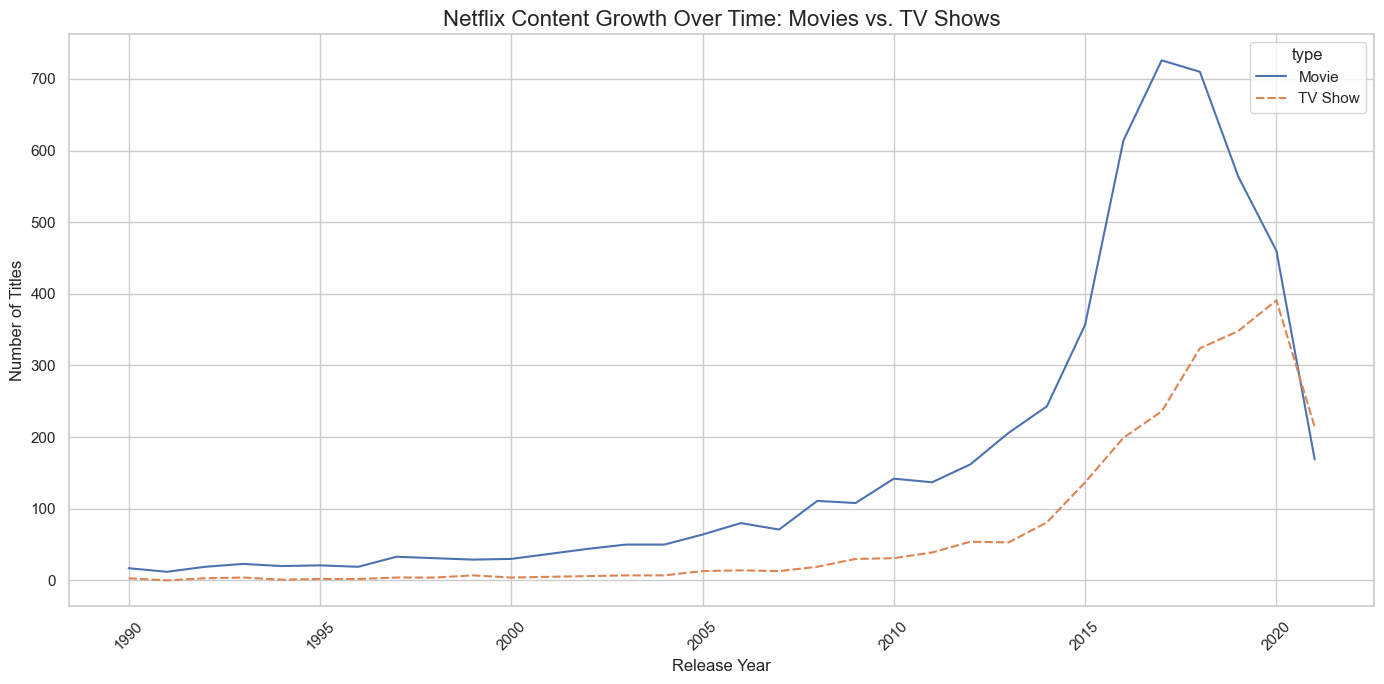

In [71]:
# Filter out rows with missing release_year or type
df_clean = df[(df['release_year'].notnull()) & (df['type'].notnull())]

# Group by type and release year
content_trend = df_clean.groupby(['release_year', 'type']).size().reset_index(name='count')

# Pivot to create separate columns for Movies and TV Shows
trend_pivot = content_trend.pivot(index='release_year', columns='type', values='count').fillna(0)

# Plot the time series
plt.figure(figsize=(14, 7))
sns.lineplot(data=trend_pivot)
plt.title('Netflix Content Growth Over Time: Movies vs. TV Shows', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 8: WordCloud and Text Analysis

To understand the thematic focus of Netflix content, we generated WordClouds from the descriptions of Movies and TV Shows.

- The WordClouds show dominant themes across content types.
- Movie descriptions often emphasize genres like *action, drama, romance*.
- TV Show descriptions highlight *relationships, series arcs,* and *drama*.

This gives us a surface-level textual insight into what Netflix markets most to users.

#### 9.1 – Movies WordCloud

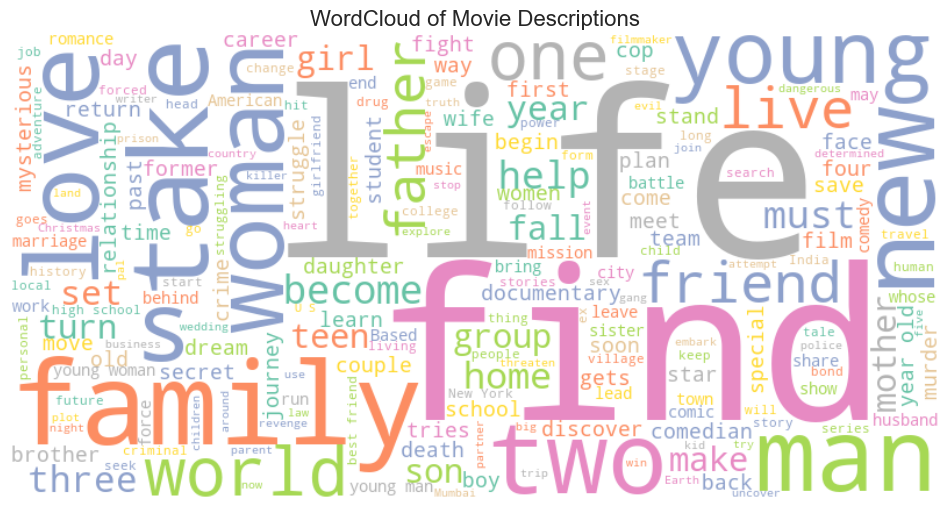

In [81]:
# Create subsets
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Combine all descriptions for movies
movie_text = ' '.join(movies['description'].dropna().astype(str))

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# WordCloud for Movies
plt.figure(figsize=(12, 8))
movie_wc = WordCloud(width=800, height=400, background_color='white',
                     stopwords=STOPWORDS, colormap='Set2').generate(movie_text)
plt.imshow(movie_wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Movie Descriptions', fontsize=16)
plt.show()

#### 9.2 – TV Shows WordCloud

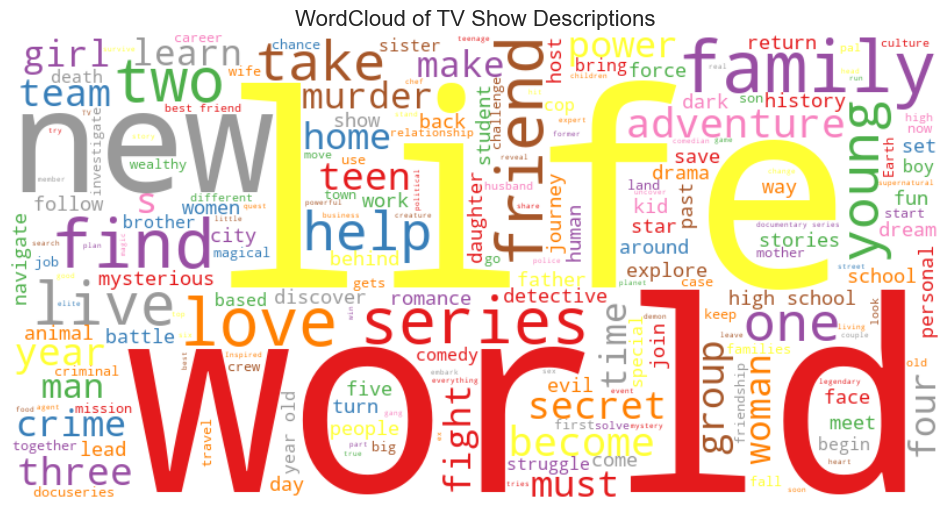

In [84]:
# WordCloud for TV Shows
# Filter the TV Shows
tv_shows = df[df['type'] == 'TV Show']

# Create the text corpus
tv_text = ' '.join(tv_shows['description'].dropna().astype(str))

plt.figure(figsize=(12, 8))
tv_wc = WordCloud(width=800, height=400, background_color='white',
                  stopwords=STOPWORDS, colormap='Set1').generate(tv_text)
plt.imshow(tv_wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of TV Show Descriptions', fontsize=16)
plt.show()
